<a href="https://colab.research.google.com/github/0Rumi1/transformer__sentiment_analysis/blob/main/%EC%95%8C%EB%9D%BC%EB%AF%B8_google_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dromm_google.csv')

In [ ]:
df.head(3)

# reviewCreatedVersion : 리뷰 작성 당시 App 버전, 없는 경우엔 설치 안하고 작성한 것으로 추정


,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,ef9743e9-6ec4-4124-bf2c-7dd77ea3e131,물흐리기,https://play-lh.googleusercontent.com/a/AGNmyx...,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-03-30 11:31:21,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것...",2023-04-05 11:51:48
1,1,55155585-be75-4a6c-95fa-e6e62e55d207,JS,https://play-lh.googleusercontent.com/a/AGNmyx...,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-03-31 20:04:48,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ...",2023-04-05 11:55:38
2,2,a4108fea-8155-45de-8b73-164149537e83,김지윤,https://play-lh.googleusercontent.com/a-/ACB-R...,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-02-11 07:59:23,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것...",2023-02-14 10:48:04


In [ ]:
df = df.drop(['Unnamed: 0', 'reviewId', 'userImage', 'repliedAt'], axis=1)

In [ ]:
df.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-03-30 11:31:21,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-03-31 20:04:48,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-02-11 07:59:23,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
vc = df['score'].value_counts().sort_index(ascending=False)

In [ ]:
vc

5.0    44396
4.0     4654
3.0     1391
2.0      812
1.0     2562
Name: score, dtype: int64


*   구글플레이 앱 리뷰 점수별 갯수



[Text(0, 0, '2562'),
 Text(0, 0, '812'),
 Text(0, 0, '1391'),
 Text(0, 0, '4654'),
 Text(0, 0, '44396')]

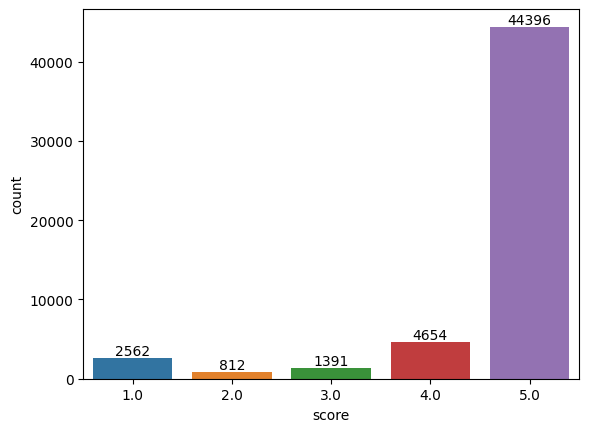

In [ ]:
ct = sns.countplot(x = 'score', data = df)
ct.bar_label(ct.containers[0])



*   구글플레이 앱 리뷰 점수별 분포

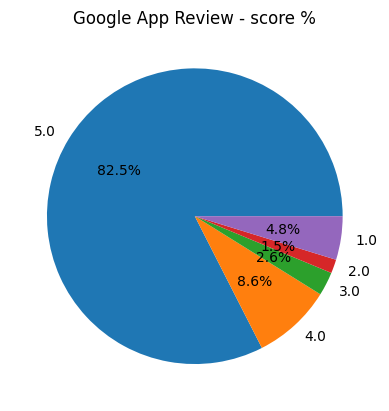

In [ ]:
plt.pie(vc, labels=vc.index, autopct='%.1f%%')
plt.title('Google App Review - score %')
# plt.legend()
plt.show()



*   리뷰수와 평점의 상관 관계 확인하기
*   리뷰 최신순으로 정렬 후 리뷰 수와 평점의 트렌드 확인
*   각 달의 평점을 평균으로 잡고, 평점과 리뷰 개수의 추세 파악



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53816 entries, 0 to 53815
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userName              53815 non-null  object 
 1   content               53737 non-null  object 
 2   score                 53815 non-null  float64
 3   thumbsUpCount         53815 non-null  float64
 4   reviewCreatedVersion  50073 non-null  object 
 5   at                    53815 non-null  object 
 6   replyContent          14941 non-null  object 
dtypes: float64(2), object(5)
memory usage: 2.9+ MB


In [ ]:
# at을 date 타입으로 변경하기

df['at'] = pd.to_datetime(df['at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53816 entries, 0 to 53815
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              53815 non-null  object        
 1   content               53737 non-null  object        
 2   score                 53815 non-null  float64       
 3   thumbsUpCount         53815 non-null  float64       
 4   reviewCreatedVersion  50073 non-null  object        
 5   at                    53815 non-null  datetime64[ns]
 6   replyContent          14941 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.9+ MB


In [ ]:
# score 점수 1.0 과 2.0 을 포함하는 리뷰 

df_12 = df[df['score'].isin([1.0, 2.0])]
df_12.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
3,J Lee,잘쓰고 있었는데 얼마전 이상한 일이 일어남. 알람을 5개씩 맞췄는데도 아침에 내가 ...,1.0,0.0,5.55.00,2023-04-06 07:26:43,NaN
5,han sung Lee,"결제하지 마세요! ""사용성 최적화""를 위한 문의.버그,제안,칭찬을 알라미 회사가 막...",1.0,3.0,5.54.04,2023-03-26 10:52:41,"안녕하세요, 알라미 팀의 June​입니다. 원활한 알라미 이용에 불편을 드려 죄송합..."
6,백호한테는말하지마,앱의 기능이 사라졌습니다. 핸드폰 종료방지 기능... 그 기능이 사라진 이후 한 번...,1.0,10.0,5.53.05,2023-03-09 22:36:40,"안녕하세요, 알람이 울릴 때 자꾸 전원을 끄게 되어 많이 당황스러우셨을 것 같아요...."


In [ ]:
# date 최신순으로 정렬하기

df['at'] = sorted(df['at'], reverse=True)
df.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-04-07 07:52:03,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."


In [ ]:
df.isnull().sum()

userName                    1
content                    79
score                       1
thumbsUpCount               1
reviewCreatedVersion     3743
at                          1
replyContent            38875
dtype: int64

In [ ]:
# score 행에 null 값이 있으면 삭제 처리 

df.dropna(subset=['score'], inplace=True)
df.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-04-07 07:52:03,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."


In [ ]:
df.isnull().sum()

userName                    0
content                    78
score                       0
thumbsUpCount               0
reviewCreatedVersion     3742
at                          0
replyContent            38874
dtype: int64

In [ ]:
# 최근 5년간의 추세 그래프 확인하기
# 2018 - 2022(3)

mask = (df['at'].dt.year >= 2018) & (df['at'].dt.year <= 2023)
df = df.loc[mask]

In [ ]:
# 월 평균 score 점수로 변경

result = df.groupby(pd.Grouper(key='at', freq='M')).mean()
result

<ipython-input-20-de5107792a62>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby(pd.Grouper(key='at', freq='M')).mean()


,score,thumbsUpCount
at,,
2018-01-31,4.497260,0.568493
2018-02-28,4.797297,0.364865
2018-03-31,4.858712,0.285505
2018-04-30,4.840074,0.329963
2018-05-31,4.848780,0.425610
...,...,...
2022-12-31,3.495238,2.028571
2023-01-31,3.176471,3.411765
2023-02-28,3.027344,7.496094


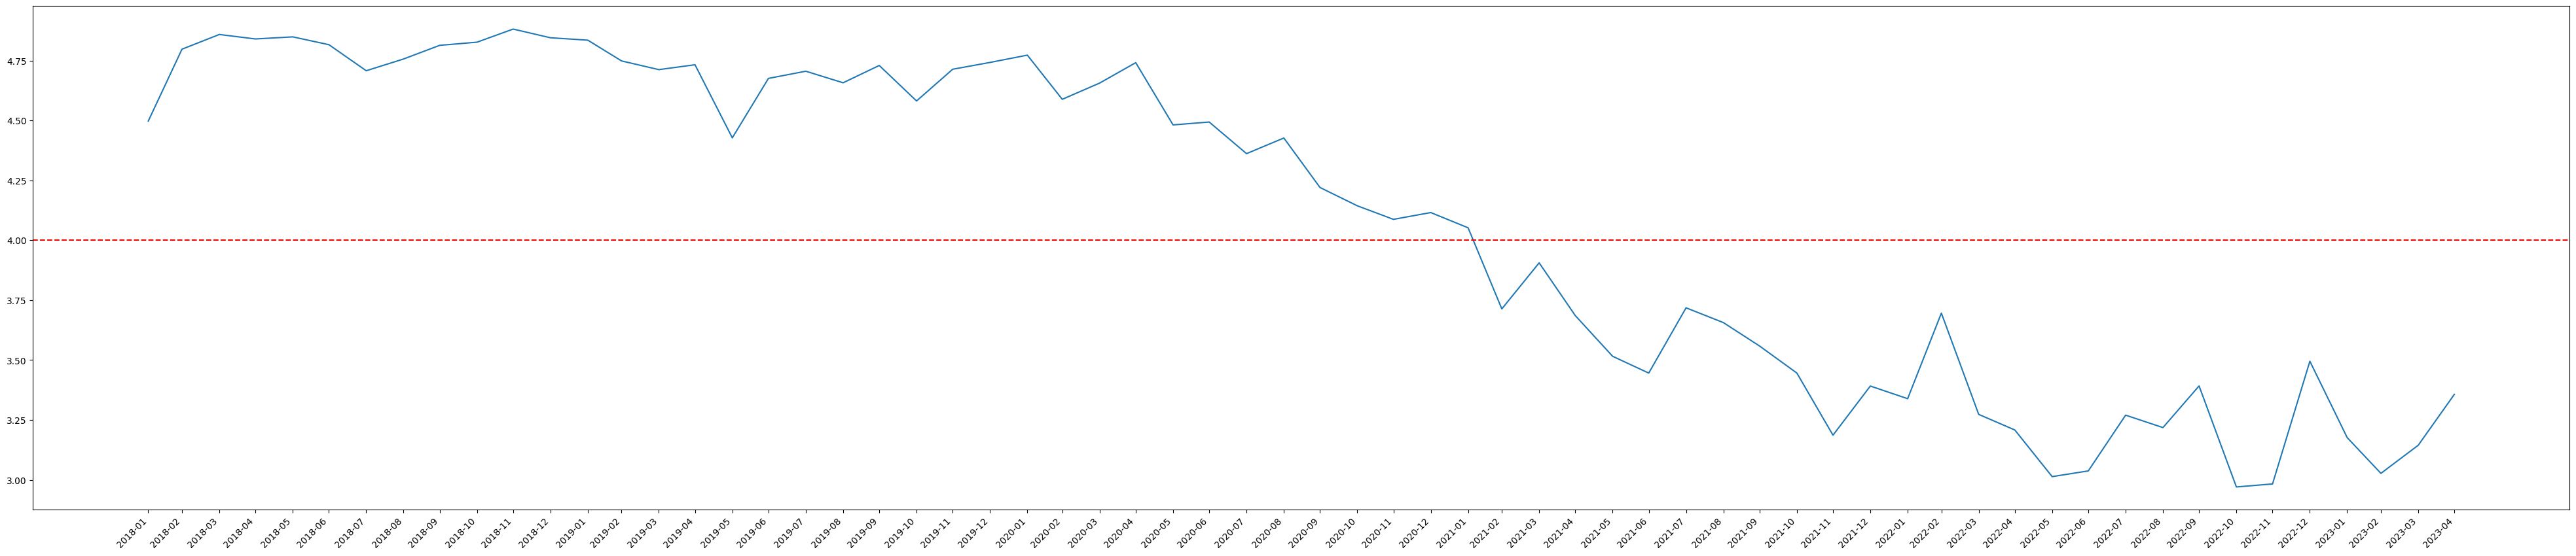

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(50,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

# x축 눈금 설정
xtick_labels = result.index.strftime('%Y-%m')  # '%Y-%m' 형식의 문자열 추출
ax.set_xticks(result.index)  # x축 눈금 위치 설정
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')  # x축 눈금 레이블 설정

ax.plot(result.index, result['score'])

# # 추세선 생성
# z = np.polyfit(range(len(result)), result['score'], 1)
# p = np.poly1d(z)
# ax.plot(result.index, p(range(len(result))))

# score가 4인 직선 그래프 생성
ax.axhline(y=4, color='r', linestyle='--')

plt.show()

# plt.savefig('/content/drive/MyDrive/Colab Notebooks/greview1823.jpg', bbox_inches='tight')


*   월 평균 score 점수가 꾸준히 감소하는 추세
*   2021년 1월 이후로 월 평균 score 이 4점 이하
*   해당 기간동안 리뷰 내용을 파악하여 부정적인 의견은 리뷰가 아닌 문의 채팅 혹은 문제 상황을 해결할 방법을 충분히 안내할 수 있어야함 

In [ ]:
# 월평균 4점 이하로 유지 중인 2021년 1월 이후의 데이터 뽑기
df_21 = (df['at'].dt.year >= 2021)
df_21 = df.loc[df_21]
df_21.head(2)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."


In [ ]:
# 5066개 리뷰 존재

df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5066 entries, 0 to 5065
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              5066 non-null   object        
 1   content               5066 non-null   object        
 2   score                 5066 non-null   float64       
 3   thumbsUpCount         5066 non-null   float64       
 4   reviewCreatedVersion  4484 non-null   object        
 5   at                    5066 non-null   datetime64[ns]
 6   replyContent          1353 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 316.6+ KB


In [ ]:
# 년도 - 월별 score 분포 갯수 확인하기
# 년도 및 월별로 나누기

mc = df['score'].value_counts().sort_index(ascending=False)
print(mc)

tc = df_21['score'].value_counts().sort_index(ascending=False)
print(tc)

5.0    20217
4.0     2287
3.0      912
2.0      602
1.0     2040
Name: score, dtype: int64
5.0    2451
4.0     606
3.0     469
2.0     373
1.0    1167
Name: score, dtype: int64


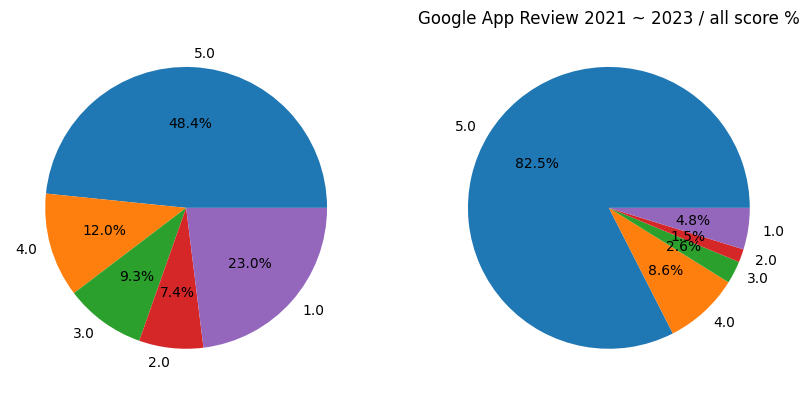

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(tc, labels=tc.index, autopct='%.1f%%')
# plt.title=('Google App Review 2021 ~ 2023 / all score %')

ax2.pie(vc, labels=vc.index, autopct='%.1f%%')
ax2.set_title('Google App Review 2021 ~ 2023 / all score %')
plt.show()


*   1 ~ 2 점대의 부정적 의견이 늘어남
*   해당 리뷰를 남긴 유저의 공통점을 파악 (버전, 리뷰 내용: 자연어 처리 요약 모델 사용, 특정 기간에 별점이 낮아졌는지? issue 파악)
*   별점은 5점을 줬지만 개선사항 요청하는 리뷰 내용 - 충성 고객으로 분류, 공통적인 의견을 파악하여 이들의 만족도 높임
*   별점 1-2 점의 리뷰 내용 - 이탈 유저로 분류, 공통된 리뷰 내용 파악 - 이후에 발생할 수 있는 이탈 유저를 줄인다.

In [ ]:
# 그래프를 이미지로 저장

plt.savefig('google1823.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
# 일자별 score 평균 점수를 내어 추세 그래프 확인
# 년도에 따른 월별 score 의 counts 확인

tc = df_21['score'].value_counts().sort_index(ascending=False)
print(tc)

vc = df_21.groupby([df_21['at'].dt.year, df_21['at'].dt.month])['score'].value_counts().sort_index(ascending=False)
vc.head(50)

5.0    2451
4.0     606
3.0     469
2.0     373
1.0    1167
Name: score, dtype: int64


at    at  score
2023  4   5.0      12
          4.0       3
          3.0       4
          2.0       1
          1.0       8
      3   5.0      64
          4.0      45
          3.0      42
          2.0      29
          1.0      55
      2   5.0      74
          4.0      35
          3.0      43
          2.0      32
          1.0      72
      1   5.0      42
          4.0      17
          3.0      13
          2.0      14
          1.0      33
2022  12  5.0      48
          4.0      13
          3.0      10
          2.0      11
          1.0      23
      11  5.0      40
          4.0      16
          3.0       8
          2.0      12
          1.0      43
      10  5.0      18
          4.0      11
          3.0      11
          2.0       7
          1.0      21
      9   5.0      20
          4.0       7
          3.0       9
          2.0       3
          1.0      12
      8   5.0      35
          4.0       7
          3.0      10
          2.0      12
          1.0   

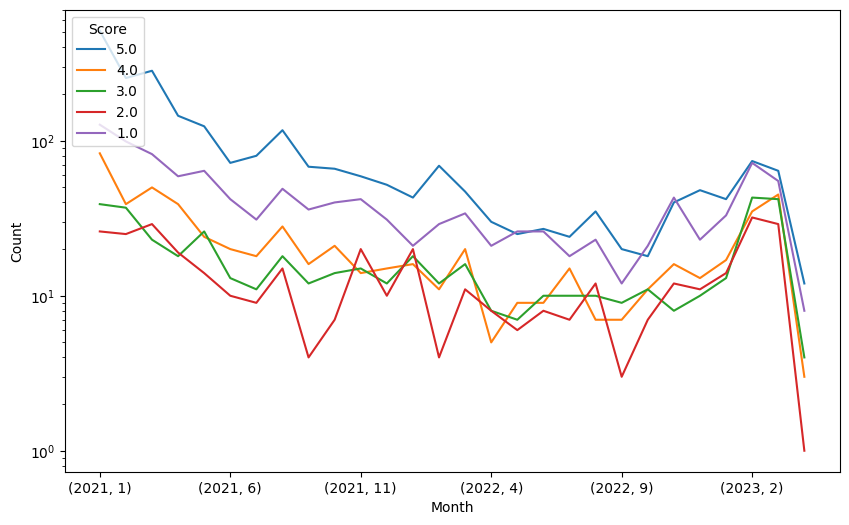

In [ ]:

# 년도와 월별로 그룹화한 후, score를 count
grouped = df_21.groupby([df_21['at'].dt.year, df_21['at'].dt.month])['score']
counts = grouped.value_counts().unstack().fillna(0)

# counts 데이터프레임에서 5, 4, 3, 2, 1에 해당하는 열만 선택
counts = counts.loc[:, [5.0, 4.0, 3.0, 2.0, 1.0]]

# 월에 따라 정렬
# counts = counts.reindex(columns=range(1, 13))

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(ax=ax)

# y 축 스케일 조정
ax.set_yscale('log')
# ax.set_xticks(range(1, 13))
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.legend(title='Score', loc='upper left')

# 그래프 출력
plt.show()



*   1점이 높은 비율로 많이 차지함
*   1점과 5점의 그래프 추세가 거의 비슷



In [ ]:
counts

score    5.0  4.0  3.0  2.0  1.0
at   at                         
2021 1   513   83   39   26  127
     2   254   39   37   25   99
     3   283   50   23   29   82
     4   145   39   18   19   59
     5   124   24   26   14   64
     6    72   20   13   10   42
     7    80   18   11    9   31
     8   117   28   18   15   49
     9    68   16   12    4   36
     10   66   21   14    7   40
     11   59   14   15   20   42
     12   52   15   12   10   31
2022 1    43   16   18   20   21
     2    69   11   12    4   29
     3    47   20   16   11   34
     4    30    5    8    8   21
     5    25    9    7    6   26
     6    27    9   10    8   26
     7    24   15   10    7   18
     8    35    7   10   12   23
     9    20    7    9    3   12
     10   18   11   11    7   21
     11   40   16    8   12   43
     12   48   13   10   11   23
2023 1    42   17   13   14   33
     2    74   35   43   32   72
     3    64   45   42   29   55
     4    12    3    4    1    8

In [ ]:
# score 의 평균 점수를 추세선으로 나타냄

In [ ]:
from datetime import datetime

# 날짜부분만 가져오기
df['at'] = df['at'].dt.date


In [ ]:
df.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것..."
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-04-07,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것..."


In [ ]:
# import matplotlib.pyplot as plt
 
# fig = plt.figure(figsize=(50,10)) ## 캔버스 생성
# fig.set_facecolor('white') ## 캔버스 색상 설정
# ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
# ax.plot(df['at'],df['score']) ## 선그래프 생성
 
# plt.xticks(rotation=45) ## x축 눈금 라벨 설정 - 40도 회전 
# # plt.title('Sales for 10 days',fontsize=20) ## 타이틀 설정
# plt.show()

In [ ]:
df_21.corr()

# content 의 내용이 길수록 score 점수와 연관이 있을까? 
# - content 문자 길이로 변환, score 을 원핫 인코딩으로 변경하여 corr 가능하도록 만든다.

# score 과 thumbsUpCount 연관성 없다.
# 따라서, thumbsUpCount 행 삭제하기

<ipython-input-34-9f8224d87259>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_21.corr()


,score,thumbsUpCount
score,1.000000,-0.112233
thumbsUpCount,-0.112233,1.000000


In [ ]:
df_21['content_length'] = df_21['content'].apply(len)

<ipython-input-35-2354a496cb19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['content_length'] = df_21['content'].apply(len)


In [ ]:
df_21.head(3)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,content_length
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것...",249
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ...",308
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-04-07 07:52:03,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것...",169


In [ ]:
df_encoded = pd.get_dummies(df_21, columns=['score'], prefix='score')
df_encoded.head(3)

,userName,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,content_length,score_1.0,score_2.0,score_3.0,score_4.0,score_5.0
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것...",249,0,0,0,0,1
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ...",308,0,0,0,0,1
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",64.0,5.51.05,2023-04-07 07:52:03,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것...",169,0,0,1,0,0


In [ ]:
# 문자 길이에 따른 별점이 점수는 연관성이 그닥 없어보임
df_encoded.corr()

<ipython-input-38-4d92ed482618>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_encoded.corr()


,thumbsUpCount,content_length,score_1.0,score_2.0,score_3.0,score_4.0,score_5.0
thumbsUpCount,1.000000,0.407673,0.081776,0.039208,0.040827,-0.019087,-0.100676
content_length,0.407673,1.000000,0.130761,0.098514,0.076071,0.010203,-0.212404
score_1.0,0.081776,0.130761,1.000000,-0.154237,-0.174746,-0.201664,-0.529657
score_2.0,0.039208,0.098514,-0.154237,1.000000,-0.090049,-0.103920,-0.272939
score_3.0,0.040827,0.076071,-0.174746,-0.090049,1.000000,-0.117738,-0.309232
score_4.0,-0.019087,0.010203,-0.201664,-0.103920,-0.117738,1.000000,-0.356866
score_5.0,-0.100676,-0.212404,-0.529657,-0.272939,-0.309232,-0.356866,1.000000


In [ ]:
df_12 = df_12.reset_index(drop=True)

In [ ]:
df_12.isnull().sum()

userName                  0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion    678
at                        0
replyContent            985
dtype: int64

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.8 MB/s eta 0:00:00


In [ ]:
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

import pandas as pd
import torch

In [ ]:

tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')
model = BartForConditionalGeneration.from_pretrained('digit82/kobart-summarization')
tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [ ]:
def generate_summary(text):
    if len(text) > 100:
        raw_input_ids = tokenizer.encode(text)
        input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]
        summary_ids = model.generate(torch.tensor([input_ids]), num_beams=5, max_length=1024, no_repeat_ngram_size=2)
        return tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)
    else:
        return text

In [ ]:
df_12['summary'] = df_12['content'].apply(generate_summary)

In [ ]:
def generate_summary(text):
        raw_input_ids = tokenizer.encode(text)
        input_ids = [tokenizer.bos_token_id] + raw_input_ids + [tokenizer.eos_token_id]
        summary_ids = model.generate(torch.tensor([input_ids]), num_beams=5, max_length=1024, no_repeat_ngram_size=2)
        return tokenizer.decode(summary_ids.squeeze().tolist(), skip_special_tokens=True)

In [ ]:
df_21['summary'] = df_21['content'].apply(generate_summary)

<ipython-input-47-82d05d5e5237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['summary'] = df_21['content'].apply(generate_summary)


모델 저장하기

In [ ]:
# from keras.models import load_model

# model.save_pretrained('/path/to/save/directory')

저장된 모델 불러오기

In [ ]:
# model = BartForConditionalGeneration.from_pretrained('/path/to/save/directory')

요약된 리뷰 열이 추가된 datafame 을 csv 파일로 저장

In [ ]:
import pandas as pd

# 구글 드라이브 경로에 저장
df_21.to_csv('/content/drive/MyDrive/Colab Notebooks/summary21.csv')

In [ ]:
summ = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/summary21.csv')

In [ ]:
df_21.head(5)

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,content_length,summary
0,물흐리기,몇년째 너무 유용하게 사용하고 있습니다 옛날에 사용하던 갤럭시s9+로 사용해서 그런...,5.0,7.0,5.54.04,2023-04-07 13:56:45,"안녕하세요, 알라미팀입니다. 자꾸만 홈화면으로 나가 전원을 끄게 되어 불편하셨을 것...",249,옛날에 사용하던 갤럭시s9+로 사용해서 그런지 기기 전원끄기 방지 기능도 사용이 잘...
1,JS,잘 쓰고있습니다 다만 한가지 문제가 있어 질문드립니다. 알람이 울리고 끄고 다시 자...,5.0,4.0,5.55.00,2023-04-07 08:58:53,"안녕하세요, 알라미팀입니다. 알람을 오래 울리게 둔 상태에서 발열이 심해져 불편을 ...",308,"높은그래픽의 게임을 최고사양, 최고밝기로 충전하면서 30분정도 사용했을때 정도로 손..."
2,김지윤,"나쁘지 않게 사용하고 있는 어플인데.. 분명 문제 풀 때, 무제한으로 음소거 가능하...",3.0,64.0,5.51.05,2023-04-07 07:52:03,"안녕하세요, 미션 중 음소거 무제한 설정을 해뒀음에도 소리가 울려 많이 놀라셨을 것...",169,"문제 풀 풀 때, 무제한으로 음소거 가능하록 설정을 했음에도 소리의 꺼지질 않는 문..."
3,J Lee,잘쓰고 있었는데 얼마전 이상한 일이 일어남. 알람을 5개씩 맞췄는데도 아침에 내가 ...,1.0,0.0,5.55.00,2023-04-07 06:38:34,NaN,319,잘쓰고 있었는데 흔들기 기능 중 알람소리가 꺼지는게 어떻게 도움이 될거라 생각하신거예요?
4,홍성민,다시 잠들기 기능 등 다 좋습니다. 다만 다른 사람의 의견에는 '알람 해제 어려움'...,5.0,8.0,5.54.51-beta,2023-04-06 14:18:03,"안녕하세요, 소중한 시간 내어 의견 남겨주셔서 감사해요. 원하시는 일정에 따라 알람...",198,다른 사람의 의견에는 '알람 해제 어려움'이라는 내용이 공통적으로 있는데 알람 저장...


In [ ]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5066 entries, 0 to 5065
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userName              5066 non-null   object        
 1   content               5066 non-null   object        
 2   score                 5066 non-null   float64       
 3   thumbsUpCount         5066 non-null   float64       
 4   reviewCreatedVersion  4484 non-null   object        
 5   at                    5066 non-null   datetime64[ns]
 6   replyContent          1353 non-null   object        
 7   content_length        5066 non-null   int64         
 8   summary               5066 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 395.8+ KB


In [ ]:
df_21['summary'].head(10)

0    옛날에 사용하던 갤럭시s9+로 사용해서 그런지 기기 전원끄기 방지 기능도 사용이 잘...
1    높은그래픽의 게임을 최고사양, 최고밝기로 충전하면서 30분정도 사용했을때 정도로 손...
2    문제 풀 풀 때, 무제한으로 음소거 가능하록 설정을 했음에도 소리의 꺼지질 않는 문...
3    잘쓰고 있었는데 흔들기 기능 중 알람소리가 꺼지는게 어떻게 도움이 될거라 생각하신거예요?
4    다른 사람의 의견에는 '알람 해제 어려움'이라는 내용이 공통적으로 있는데 알람 저장...
5                  알라미 회사가 막아논 유료 (주는대로 먹어)어플리케이션 입니다.
6    핸드폰 종료방지 기능이 사라진 이후 한 번도 제 시간에 일어나본 적이 없는데, 그 ...
7    걷기 미션에서 걷고 있는데도 숫자는 꼼짝하지 않음. 핸드폰 화면이 켜저있지 않으면,...
8    미션 흔들기70번 설정해두고 소리 최대로 해놓고 자면 어느샌가 일어나서 휴대폰을 흔...
9    미션을 수행하는중 갑자기 알림이 울림 시간이 지날수록 알람 커지는데 이렇게 알림을 ...
Name: summary, dtype: object

In [ ]:
# crm 부서에게 내용 전달
# 안울린다는 이용자가 많다면, 상황이 어떠한지 앱이 아닌 사용자의 잘못으로 알림이 켜지지 않은건 아닌지 확인이 필요함
# 사용자의 잘못이라면 앱의 기능에 대해 안내가 더욱 필요함
# 백그라운드의 앱을 종료하지 못하도록 설정하는 등
# 분류하기
# 알람 기능
# 오류 및 버그
# 

In [ ]:
# sql 활용

In [ ]:
# 우울함과 이탈이 영향이 있을지?
# 우울함을 해결하진 못하더라도, 자신의 삶을 자신이 컨트롤한다는 것을 유지시켜 자존감을 높여주는 것이 필요
